In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as sps
from collections import namedtuple
%precision 2
Distribution = namedtuple("Distribution", ["range_x", "range_y", "f"])

def E(d, g):
    return np.sum([g(x, y) * d.f(x, y) for x in d.range_x for y in d.range_y])
def V(d, xf):
    return E(d, lambda x,y: xf(x, y) ** 2) - (E(d, xf) ** 2)
def Cov(d):
    fst = lambda x,y: x
    snd = lambda x,y: y
    return E(d, lambda x,y: ((x - E(d, fst)) * (y - E(d, snd))))

# Independently And Identically Distributed Variables


## Independence

Two variables are said to be **independent** of each other if, and only if the following holds true:

$$
f_{XY}(x, y) = f_X(x)f_Y(y)
$$

or more generally, for any number of variables:

$$
f_\textbf{X}(\textbf{X}) = \prod_i^n{f_{X_i}(X_i)}
$$

Intuitively, two variables are independent if the outcome of one doesn't influence the outcome of the other - for example flipping a coin once does not have any influence on the next time we flip it. On the other hand, drawing a card from a deck influences the next draw (since there is one card missing) - in this case, the two draws are dependent on each other.



## Independent vs Uncorrelated Variables

**Uncorrelated** means that there is no linear relationship between the two variables, and that their covariance is 0. Let us test whether two independent variables are uncorrelated or vice versa:

---
First we examine the case of two independent variables.

In [2]:
d = Distribution(range(1, 7), range(1, 7), lambda x,y: x * y / 441)
print(Cov(d).astype(np.float16))

-0.0


We see that their covariance is 0. **Two independent variables always have a covariance of 0**.

---
Now consider the following case:

Let $X$ and $Y$ be independent of each other and defined by:

$$
f(x) = \begin{cases}
0.5 & x \in \{0, 1\} \\
0 & otherwise
\end{cases}
$$

$$
g(y) = \begin{cases}
0.5 & y \in \{-1, 1\} \\
0 & otherwise
\end{cases}
$$

Now let $Z = XY$. The covariance of $Z$ and $X$ is:

$$
\begin{aligned}
Cov(Z, X) &= E((X - E(X)(Z - E(Z)) = E(XZ) - \mu_X\mu_Z \\
&= E(X^2Y) - E(X)E(XY) \\
&= E(X^2)E(Y) - E(X)^2E(Y) \\
&= 0
\end{aligned}
$$

And thus $Z$ and $X$ are uncorrelated, even though they are dependent ($X$ determines $Z$).

Note that the independency of $X$ and $Y$ implies $E(f(X)g(Y)) = E(f(X))E(g(Y))$.

---
## Sum Distribution

The sum distribution is the distribution of the sum $\sum_i^n{X_i} = X_1 + X_2 + ... + X_n$.

First, let us define the expectation:

$$
E(X_1 + X_2 + ... + X_n) = E(X_1) + E(X_2) + ... + E(X_n)
$$

#### TODO: Proof

---
Next, we can derive the following about the variance of $X + Y$ when they are **independent**:

$$
V(\sum{X_i}) = \sum{V(X_i)}
$$

This follows from the fact that if $X_i$ and $X_j$ are independent (and thus uncorrelated), their covariance is zero, which, substituted in the formula:

$$
V(X + Y) = V(X) + V(Y) + 2Cov(X, Y)
$$

yields the above result.

---

## Distribution of the Sum of Normal Distributions

Let us consider the two variables $X \sim N(1, 2)$ and $Y \sim N(2, 3)$. From the above formulas, we get:

$$
E(X + Y) = E(X) + E(Y) = 3
$$

$$
V(X + Y) = V(X) + V(Y) = 5
$$

The sum of two normally distributed variables is actually itself a normal distribution <sup>**NEEDS PROOF**</sup>. This is called the **reproductive property**.

---
Now let's try plotting the distribution of $X + Y$:

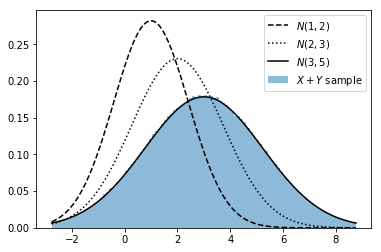

In [3]:
rv_x = sps.norm(1, np.sqrt(2))
rv_y = sps.norm(2, np.sqrt(3))
N = int(1e6)
xs = rv_x.rvs(N)
ys = rv_y.rvs(N)

z = xs + ys

z0 = np.percentile(z, .5)
z1 = np.percentile(z, 99.5)
X = np.linspace(z0, z1, 100)

plt.plot(X, rv_x.pdf(X), color='black', ls='--', label="$N(1, 2)$")
plt.plot(X, rv_y.pdf(X), color='black', ls=':', label="$N(2, 3)$")

_= plt.hist(z, range=(z0, z1), bins=100, density=True, alpha=.5, label="$X + Y$ sample")
rv_xy = sps.norm(3, np.sqrt(5))
plt.plot(X, rv_xy.pdf(X), color='black', label="$N(3, 5)$")
plt.legend()

---
We can use the reproductive property to derive a general formula for the distribution of $n$ normally distributed variables:

$$
\sum_{i=1}^n{X_i} \sim N(\sum_{i=1}^n{\mu_i}, \sum_{i=1}^n{\sigma^2_i}
$$



## Distribution of the Sum of Poisson Distributions

Recall that for a Poisson distribution:

$$
E(X) = \lambda \\
V(X) = \lambda
$$

Therefore, for the sum of independent Poisson distributions, we have:

$$
E(\sum{X_i}) = \sum{E(X_i)} \\
V(\sum{X_i}) = \sum{V(X_i)} \\
$$

The Poisson also has the reproductive property.<sup>**Needs Proof**</sup> This means that:

$$
\sum_i{X_i} \sim Poisson(\sum_i{\lambda_i})
$$

Let us plot this:

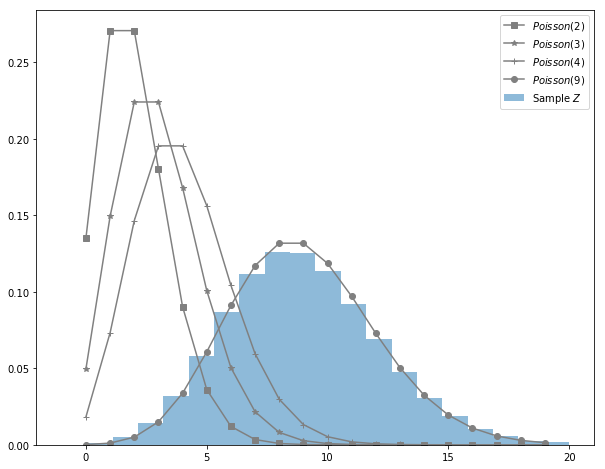

In [4]:
Ls = 2, 3, 4
rvs = [sps.poisson(l) for l in Ls]
N = int(1e6)
z = np.sum([rv.rvs(N) for rv in rvs], axis=0)
_ = plt.hist(z, bins=20, range=(-1, 20), density=True, alpha=.5, label="Sample $Z$")

X = np.arange(0, 20)
markers = "s*+o"
for m, l, rv in zip(markers, [*Ls, np.sum(Ls)], [*rvs, sps.poisson(np.sum(Ls))]):
    plt.plot(X, rv.pmf(X), marker=m, color='grey', label=f"$Poisson({l})$")
plt.gcf().set_figwidth(10)
plt.gcf().set_figheight(8)
plt.legend()

## Distribution of the Sum of Bernoulli Distributions

Recall that for a Bernoulli distribution:

$$
E(X) = p
V(X) = p(1 - p)
$$

This means that for the sum of independent distributions we have:

$$
E(\sum{X_i}) = \sum{p_i} \\
V(\sum{X_1}) = \sum{p_i(1 - p_i)}
$$

Furthermore, for $n$ variables with the same Bernoulli distribution, we would have:

$$
E(\sum^n_i{X_i}) = np \\
V(\sum^n_i{X_i}) = np(1 - p)
$$

These should look familiar - they are the expectation and variance of the Binomial distribution! The sum of Bernoulli distributions is actually the Binomial distribution:

$$
X_1, X_2, ..., X_n \sim Bernoulli(p) \implies \sum_i^n{X_i} \sim Binomial(n, p)
$$

Plotting this yields:

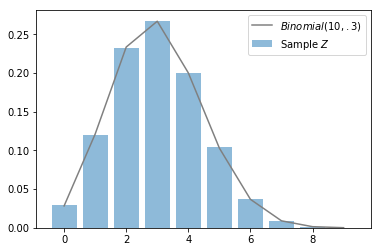

In [5]:
Ps = np.array([.3 for i in range(10)])
rvs = [sps.bernoulli(p) for p in Ps]
N = int(1e5)
z = np.sum([rv.rvs(N) for rv in rvs], axis=0)
xs = np.arange(10)
hist,_ = np.histogram(z, bins=10, range=(0, 10), density=True)
plt.bar(xs, hist, alpha=.5, label="Sample $Z$")
plt.plot(xs, sps.binom(10, .3).pmf(xs), color='grey', label="$Binomial(10, .3)$")
plt.legend()


---
## Distribution of the Sample Mean

The distribution of the sample mean is used when estimating intervals or validating the sample mean. It is the distribution of the sample mean $\overline{X}$ of the **i.i.d.** variables $X_1, X_2,...,X_n$.

First, let us take a look at the expected value:

$$
E(\overline{X}) = E(\frac{\sum^n_i{X_i}}{n}) = \frac{\sum_i^n{E(X_i)}}{n} = \frac{n\mu}{n} = \mu
$$

Now let's take a look at the variance:

$$
V(\overline{X}) = V(\frac{\sum_i^n{X_i}}{n}) = \frac{\sum_i^n{V(X_i)}}{n^2} = \frac{n\sigma^2}{n^2} = \frac{\sigma^2}{n}
$$

We can see that for any group of i.i.d. variables $X_i$, whose distribution has a mean $\mu$ and a variance $\sigma^2$, we have $E(\overline{X}) = \mu$ and $V(\overline{X}) = \frac{\sigma^2}{n}$.

## The Central Limit Theorem

The central limit theorem is a beautiful theorem, that tells us a very important fact about the sample mean of any distribution. Namely:

---
If $X_1, X_2,...,X_n$ are i.i.d., whose distribution has a mean $\mu$ and variance $\sigma^2$, then the larger $n$ is, the closer the distribution of the sample mean $\overline{X}$ is to the normal distribution $N(\mu, \frac{\sigma^2}{n})$.

---

Let us test this with $X \sim Poisson(3)$.

(1000,)


(2.830741005798068, 3.169258994201932)

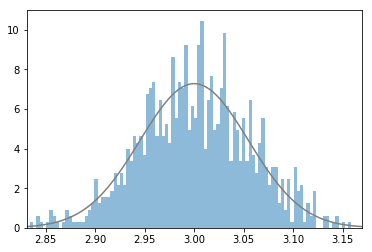

In [6]:
L = 3
rv = sps.poisson(L)

n = int(1e3)
sample_size = int(1e3)
sample_mean = np.mean(rv.rvs((n, sample_size)).astype('int8'), axis=0)
print(sample_mean.shape)

rv_norm = sps.norm(L, np.sqrt(L / n))
xs = np.linspace(rv_norm.isf(.999), rv_norm.isf(.001), 100)

_ = plt.hist(sample_mean, bins=100, density=True, alpha=.5, label='$\overline{X}$')
plt.plot(xs, rv_norm.pdf(xs), color='grey', label=f"$N(3, {np.sqrt(1 / n)})")
plt.xlim(np.amin(xs), np.amax(xs))

We can see that it is pretty close to a normal distribution!

## The Law of Large Numbers

The law of large numbers says that **the sample mean converges to the population mean as the sample size approaches infinity**. Or in other words:

$$
\overline{X} \to \mu \text{ for } n \to \infty
$$

Let us test this by taking the sample mean of a Bernoulli trial where the success is a die rolling 6.

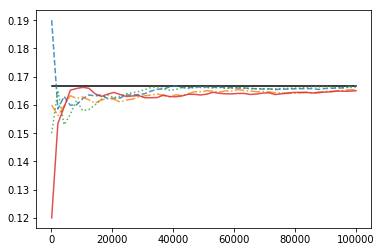

In [7]:
p = 1 / 6.0
rv = sps.bernoulli(p)

n = int(1e5)
sample = rv.rvs((n, 4))
space = np.linspace(100, n, 50).astype(int)
ylist = np.array([np.mean(sample[:sp], axis=0) for sp in space]).T

plt.plot(space, np.repeat(p, 50), color='black')
for y, ls in zip(ylist, ['--', '-.', ':', '-']):
    plt.plot(space, y, linestyle=ls, alpha=.8)

And so we see that the law of large numbers holds.